In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
train2 = pd.read_csv('data/train2.tsv', sep='\t')
test2 = pd.read_csv('data/test2.tsv', sep='\t')
val2 = pd.read_csv('data/val2.tsv', sep='\t')

In [3]:
cols = ["Index", "ID", "label", "statement", "subject", "speaker", "job", "state", "party", "barely_true_counts",
        "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context", "justification"]

In [4]:
print(train2.shape, test2.shape, val2.shape)

(10239, 16) (1266, 16) (1283, 16)


In [5]:
train2.columns = cols
test2.columns = cols
val2.columns = cols

In [6]:
train2.head()

,Index,ID,label,statement,subject,speaker,job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,justification
0,1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
1,2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
2,3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
3,4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."
4,5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh..."


In [7]:
train2 = train2.drop(columns=["Index", "ID"])
test2 = test2.drop(columns=["Index", "ID"])
val2 = val2.drop(columns=["Index", "ID"])

In [8]:
train2 = train2[['statement', 'subject', 'speaker', 'job', 'state', 'party',
       'barely_true_counts', 'false_counts', 'half_true_counts',
       'mostly_true_counts', 'pants_on_fire_counts', 'context',
       'justification', 'label']]
test2 = test2[['statement', 'subject', 'speaker', 'job', 'state', 'party',
       'barely_true_counts', 'false_counts', 'half_true_counts',
       'mostly_true_counts', 'pants_on_fire_counts', 'context',
       'justification', 'label']]
val2 = val2[['statement', 'subject', 'speaker', 'job', 'state', 'party',
       'barely_true_counts', 'false_counts', 'half_true_counts',
       'mostly_true_counts', 'pants_on_fire_counts', 'context',
       'justification', 'label']]

In [9]:
train2.head()

,statement,subject,speaker,job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,justification,label
0,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe...",half-true
1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...,mostly-true
2,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...,false
3,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start...",half-true
4,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,"But Vos specifically used the word ""fired,"" wh...",true


In [10]:
train2["source"] = "train"
test2["source"] = "test"
val2["source"] = "val"
data = pd.concat([train2, test2, val2], ignore_index=True)
print(data.shape)

(12788, 15)


In [11]:
data.isna().sum()

statement                  0
subject                    2
speaker                    2
job                     3567
state                   2749
party                      2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  131
justification             97
label                      0
source                     0
dtype: int64

In [12]:
len(data["statement"])-len(data.drop_duplicates(subset="statement"))

26

In [13]:
len(data["justification"])-len(data.drop_duplicates(subset="justification"))

114

In [14]:
data = data.drop_duplicates(subset="statement")
data = data.drop_duplicates(subset="justification")
data["statement"] = data["statement"].str.replace('[^\w\s]',' ')
data["justification"] = data["justification"].str.replace('[^\w\s]',' ')
data["statement"] = data["statement"].str.replace('[^A-Za-z]',' ')
data["justification"] = data["justification"].str.replace('[^A-Za-z]',' ')
data["statement"] = data["statement"].str.replace(' +',' ')
data["justification"] = data["justification"].str.replace(' +',' ')
data["statement"] = data["statement"].str.lower()
data["justification"] = data["justification"].str.lower()
print(data.shape)

(12650, 15)


In [15]:
train2 = data[data["source"] == "train"]
test2 = data[data["source"] == "test"]
val2 = data[data["source"] == "val"]
train2 = train2.drop(["source"], axis=1)
test2 = test2.drop(["source"], axis=1)
val2 = val2.drop(["source"], axis=1)
print(train2.shape, test2.shape, val2.shape)

(10130, 14) (1250, 14) (1270, 14)


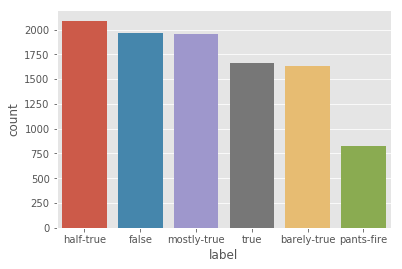

In [16]:
sns.countplot(x="label", data=train2, order=train2["label"].value_counts().index)

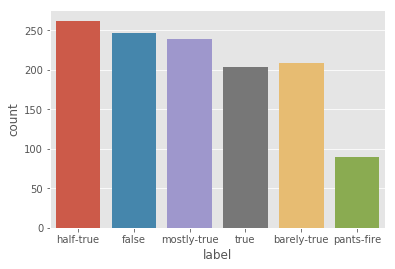

In [17]:
sns.countplot(x="label", data=test2, order=train2["label"].value_counts().index)

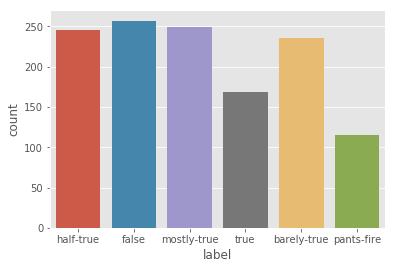

In [18]:
sns.countplot(x="label", data=val2, order=train2["label"].value_counts().index)

In [19]:
def encode_label(df):
    df.loc[df["label"] == "pants-fire", "label"] = 0
    df.loc[df["label"] == "false", "label"] = 1
    df.loc[df["label"] == "barely-true", "label"] = 2
    df.loc[df["label"] == "half-true", "label"] = 3
    df.loc[df["label"] == "mostly-true", "label"] = 4
    df.loc[df["label"] == "true", "label"] = 5
    return df

In [20]:
train2  = encode_label(train2)
test2  = encode_label(test2)
val2  = encode_label(val2)

In [21]:
train2.to_csv('data/train2.csv', index=False)
test2.to_csv('data/test2.csv', index=False)
val2.to_csv('data/val2.csv', index=False)